In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import Regularizer

class WatermarkRegularizer(Regularizer):
    def __init__(self, watermark_strength, watermark):
        self.watermark_strength = watermark_strength
        self.watermark = watermark

    def __call__(self, x):
        return self.watermark_strength * tf.reduce_sum(tf.square(x - self.watermark))

# Define the watermark
watermark = np.random.normal(size=(100,))  # Adjust size according to your layer's dimensions

# Create a simple neural network model
model = Sequential([
    Dense(100, input_shape=(784,), activation='relu',
          kernel_regularizer=WatermarkRegularizer(0.1, watermark)),  # Embed watermark in this layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Dummy data (e.g., MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Extract the watermark
extracted_weights = model.layers[0].get_weights()[0]  # Assuming the watermark is embedded in the first layer's weights
extracted_watermark = extracted_weights.flatten()

# Compare the original and extracted watermarks
print("Original Watermark:", watermark[:10])
print("Extracted Watermark:", extracted_watermark[:10])

# Simulate fine-tuning attack by training for additional epochs
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Extract the watermark after fine-tuning
extracted_weights_after_fine_tuning = model.layers[0].get_weights()[0]
extracted_watermark_after_fine_tuning = extracted_weights_after_fine_tuning.flatten()

# Compare the original and extracted watermarks after fine-tuning
print("Original Watermark:", watermark[:10])
print("Extracted Watermark (After Fine-Tuning):", extracted_watermark_after_fine_tuning[:10])


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2961.5056 - accuracy: 0.5992 - val_loss: 600.7169 - val_accuracy: 0.7098
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 201.5620 - accuracy: 0.7043 - val_loss: 33.4105 - val_accuracy: 0.7789
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 9.8309 - accuracy: 0.7277 - val_loss: 1.2972 - val_accuracy: 0.8006
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1491 - accuracy: 0.7481 - val_loss: 1.0763 - val_accuracy: 0.7183
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0744 - accuracy: 0.7537 - val_loss: 0.9118 - val_accuracy: 0.8191
Original Watermark: [ 0.1620089   0.19928589 -0.44978861  1.64950547  1.19942756 -0.43770426
 -0.17425001  1.5418373   0.43304154  1.40894901]
Extracted Watermark: [ 0.1620089   0.19928588 -0.4497886   1.6495045   1.199427   -0.43770427
 -0.17425002  1.5418365   0.43304154  1.

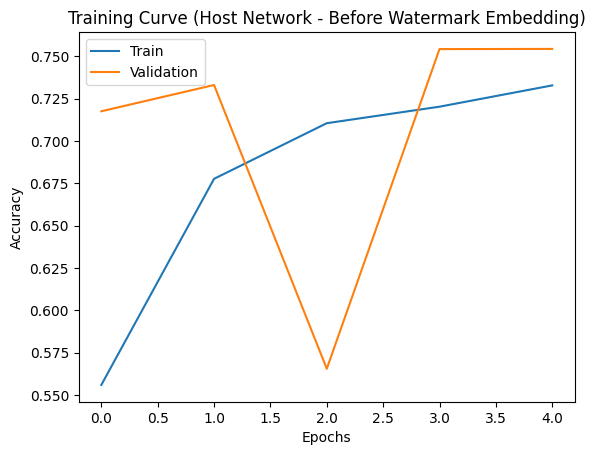

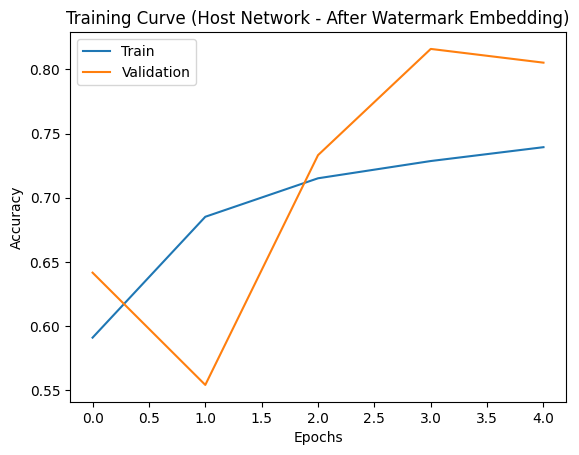

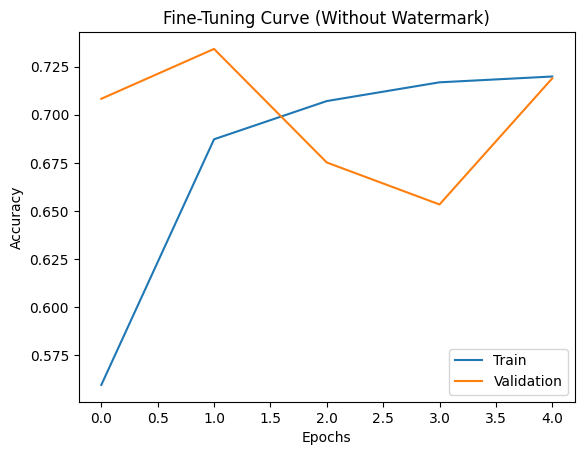

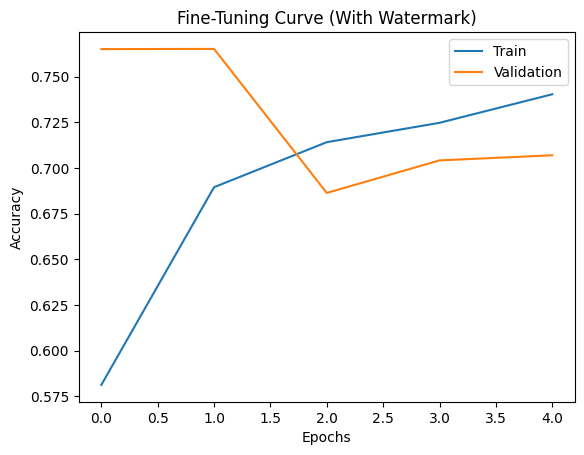

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import Regularizer

class WatermarkRegularizer(Regularizer):
    def __init__(self, watermark_strength, watermark):
        self.watermark_strength = watermark_strength
        self.watermark = watermark

    def __call__(self, x):
        return self.watermark_strength * tf.reduce_sum(tf.square(x - self.watermark))

# Define the watermark
watermark = np.random.normal(size=(100,))  # Adjust size according to your layer's dimensions

# Create a simple neural network model
def create_model():
    model = Sequential([
        Dense(100, input_shape=(784,), activation='relu',
              kernel_regularizer=WatermarkRegularizer(0.1, watermark)),  # Embed watermark in this layer
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Dummy data (e.g., MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Train the model without watermark for host network
host_model = create_model()
history_host = host_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Extract the watermark
extracted_weights = host_model.layers[0].get_weights()[0]  # Assuming the watermark is embedded in the first layer's weights
extracted_watermark = extracted_weights.flatten()

# Train the model with watermark for host network
watermarked_model = create_model()
history_watermarked = watermarked_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Simulate fine-tuning attack by training for additional epochs without watermark
host_model_fine_tuning = create_model()
history_fine_tuning_host = host_model_fine_tuning.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Simulate fine-tuning attack by training for additional epochs with watermark
watermarked_model_fine_tuning = create_model()
history_fine_tuning_watermarked = watermarked_model_fine_tuning.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Plotting the training curves
def plot_training_curves(history, title):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training curves for host network (before and after watermark embedding)
plot_training_curves(history_host, 'Training Curve (Host Network - Before Watermark Embedding)')
plot_training_curves(history_watermarked, 'Training Curve (Host Network - After Watermark Embedding)')

# Plot training curves for fine-tuning (without and with watermark)
plot_training_curves(history_fine_tuning_host, 'Fine-Tuning Curve (Without Watermark)')
plot_training_curves(history_fine_tuning_watermarked, 'Fine-Tuning Curve (With Watermark)')



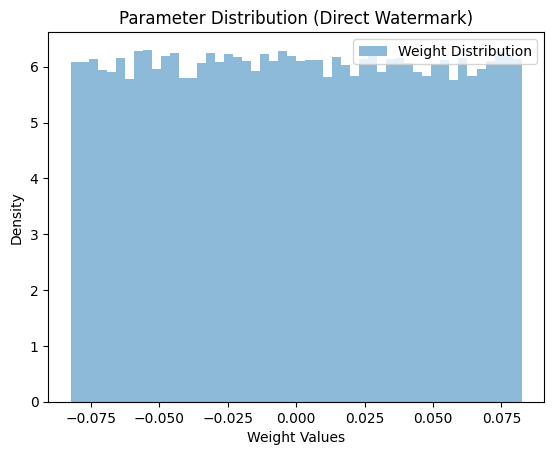

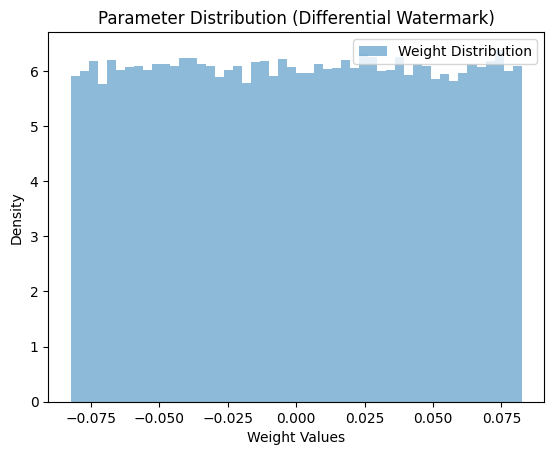

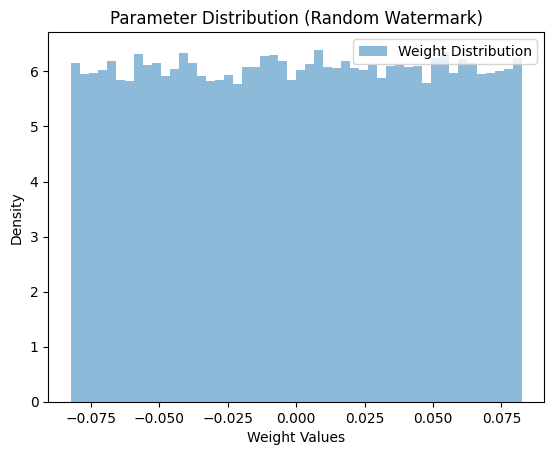

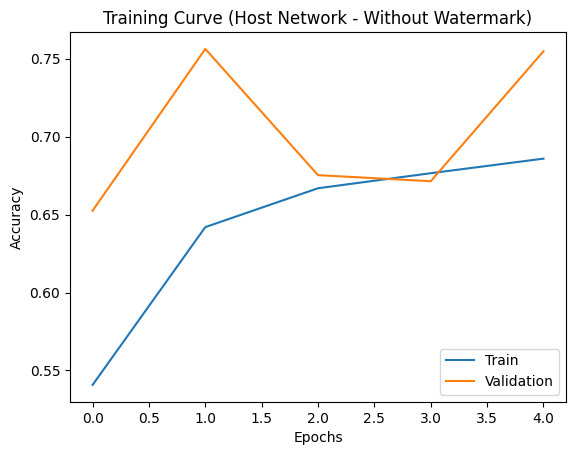

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import Regularizer

class WatermarkRegularizer(Regularizer):
    def __init__(self, watermark_strength, watermark, wtype='random'):
        self.watermark_strength = watermark_strength
        self.watermark = watermark
        self.wtype = wtype

    def set_watermark(self, p):
        if self.wtype == 'random':
            self.watermark = np.random.normal(size=p)
        elif self.wtype == 'direct':
            self.watermark = np.ones(p)
        elif self.wtype == 'diff':
            self.watermark = np.ones(p)
            self.watermark[1] = -1
        else:
            raise ValueError('Invalid watermark type. Use "random", "direct", or "diff".')

    def __call__(self, x):
        return self.watermark_strength * tf.reduce_sum(tf.square(x - self.watermark))

# Function to plot the distribution of parameters
def plot_parameter_distribution(weights, title):
    plt.hist(weights.flatten(), bins=50, density=True, alpha=0.5, label='Weight Distribution')
    plt.title(title)
    plt.xlabel('Weight Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Define the watermark
watermark_size = 100
watermark = np.random.normal(size=(watermark_size,))  # Adjust size according to your layer's dimensions

# Create a simple neural network model
def create_model(watermark_type='random'):
    model = Sequential([
        Dense(100, input_shape=(784,), activation='relu',
              kernel_regularizer=WatermarkRegularizer(0.1, watermark, watermark_type)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model without watermark for host network
host_model = create_model()
history_host = host_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Extract the watermark
extracted_weights = host_model.layers[0].get_weights()[0]  # Assuming the watermark is embedded in the first layer's weights
extracted_watermark = extracted_weights.flatten()

# Plot the distribution of parameters for direct, differential, and random watermarks
direct_model = create_model(watermark_type='direct')
direct_model_weights = direct_model.layers[0].get_weights()[0]
plot_parameter_distribution(direct_model_weights, 'Parameter Distribution (Direct Watermark)')

diff_model = create_model(watermark_type='diff')
diff_model_weights = diff_model.layers[0].get_weights()[0]
plot_parameter_distribution(diff_model_weights, 'Parameter Distribution (Differential Watermark)')

random_model = create_model(watermark_type='random')
random_model_weights = random_model.layers[0].get_weights()[0]
plot_parameter_distribution(random_model_weights, 'Parameter Distribution (Random Watermark)')

# Plot training curves for host network (before and after watermark embedding)
plot_training_curves(history_host, 'Training Curve (Host Network - Without Watermark)')
